In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TechAxis/Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.shape

(374, 13)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df = df.drop(columns=["Person ID", "Sleep Disorder"], errors = "ignore")


In [ ]:
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,189
Female,185


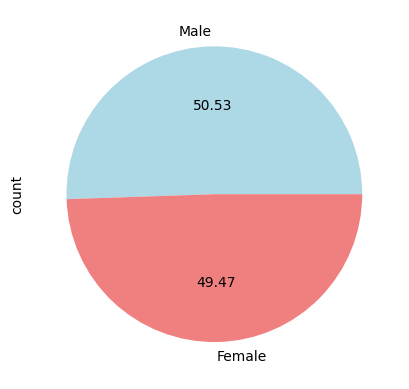

In [ ]:
df["Gender"].value_counts().plot.pie(colors=["lightblue", "lightcoral"], autopct = "%.2f")
plt.show()

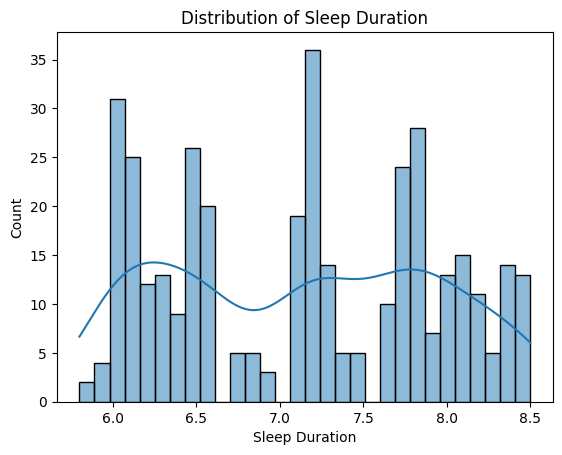

In [ ]:
sns.histplot(df["Sleep Duration"], bins=30, kde=True)
plt.title("Distribution of Sleep Duration")
plt.show()

In [ ]:
gender_sleep = df.groupby("Gender")["Sleep Duration"].mean()
gender_sleep

,Sleep Duration
Gender,
Female,7.229730
Male,7.036508


<ipython-input-16-46e69dda3424>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_sleep.index, y = gender_sleep.values, palette = "pastel")


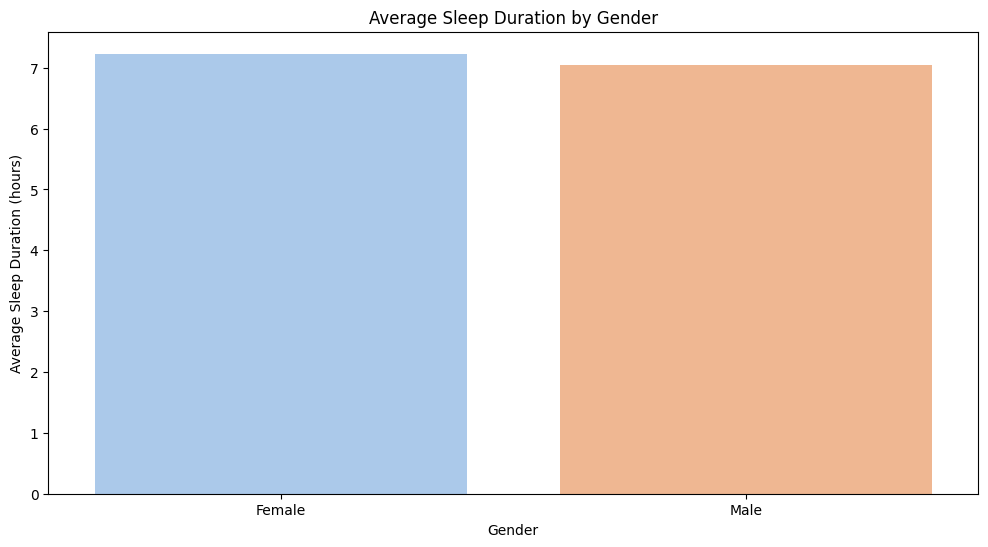

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = gender_sleep.index, y = gender_sleep.values, palette = "pastel")
plt.title("Average Sleep Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Sleep Duration (hours)")
plt.show()

<ipython-input-17-c4602fc53be7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Quality of Sleep", data = df, order = df["Quality of Sleep"].value_counts().index, palette = "Set2")


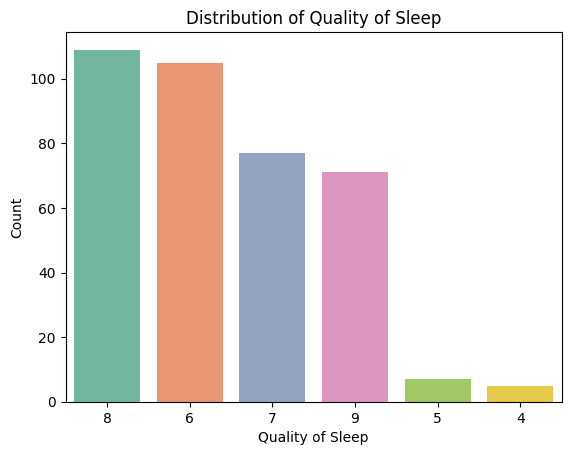

In [ ]:
sns.countplot(x = "Quality of Sleep", data = df, order = df["Quality of Sleep"].value_counts().index, palette = "Set2")
plt.title("Distribution of Quality of Sleep")
plt.xlabel("Quality of Sleep")
plt.ylabel("Count")
plt.show()

In [ ]:
gender_quality = df.groupby("Gender")["Quality of Sleep"].mean()
gender_quality

,Quality of Sleep
Gender,
Female,7.664865
Male,6.968254


<ipython-input-19-e2c8327383fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_quality.index, y = gender_quality.values, palette = "colorblind")


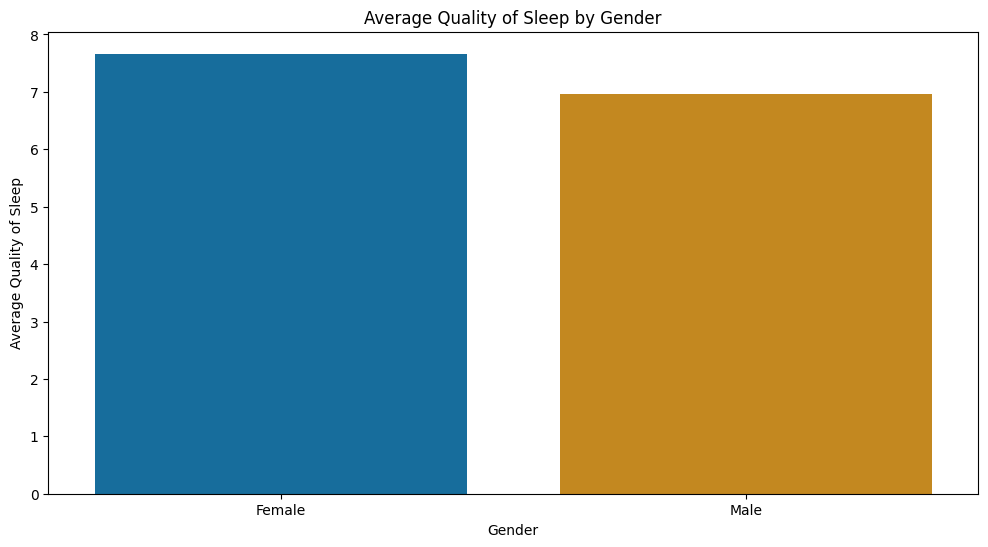

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = gender_quality.index, y = gender_quality.values, palette = "colorblind")
plt.title("Average Quality of Sleep by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Quality of Sleep")
plt.show()

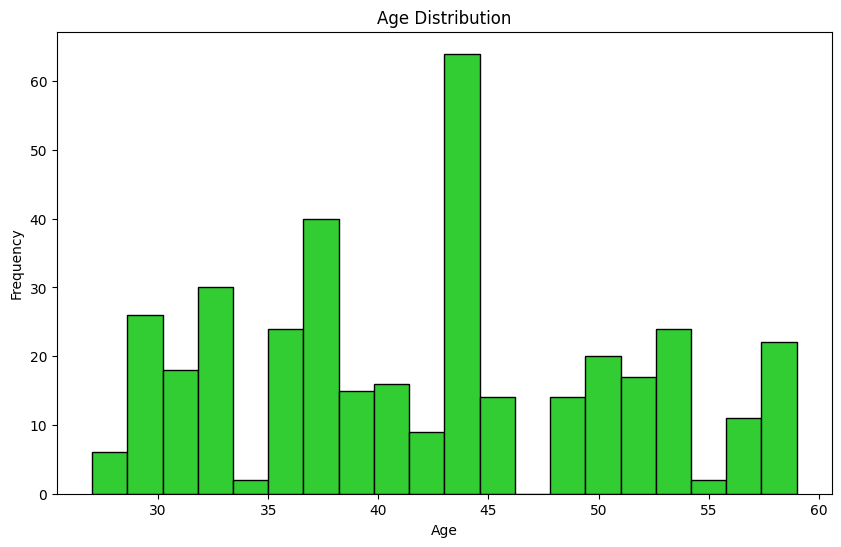

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=20, color="limegreen", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
age_sleep = df.groupby("Age")["Sleep Duration"].mean()
age_sleep

,Sleep Duration
Age,
27,6.100000
28,6.020000
29,6.669231
30,7.569231
31,7.444444
32,6.588235
33,6.061538
34,5.800000
35,7.216667


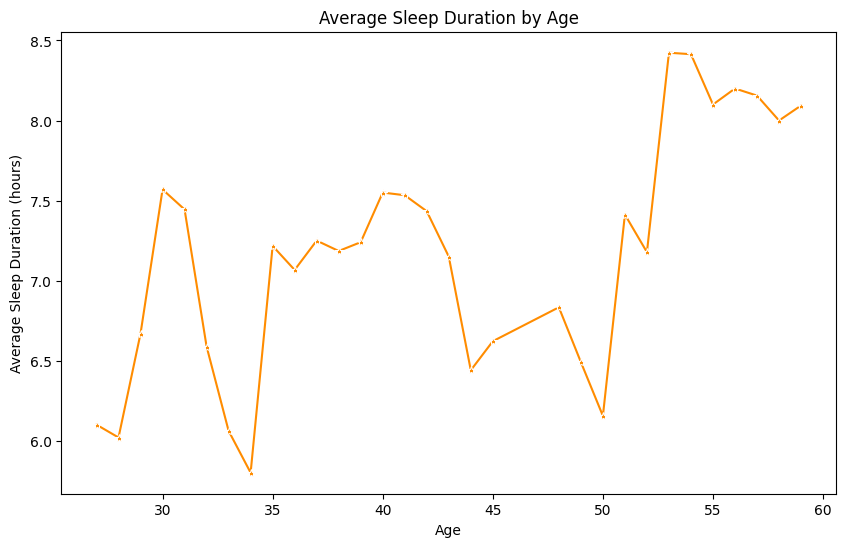

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = age_sleep, marker = "*", color = "darkorange")
plt.title("Average Sleep Duration by Age")
plt.xlabel("Age")
plt.ylabel("Average Sleep Duration (hours)")
plt.show()

In [ ]:
age_sleep_quality = df.groupby("Age")[ "Quality of Sleep"].mean()
age_sleep_quality

,Quality of Sleep
Age,
27,6.000000
28,4.800000
29,6.153846
30,6.692308
31,6.888889
32,6.529412
33,6.000000
34,4.000000
35,7.750000


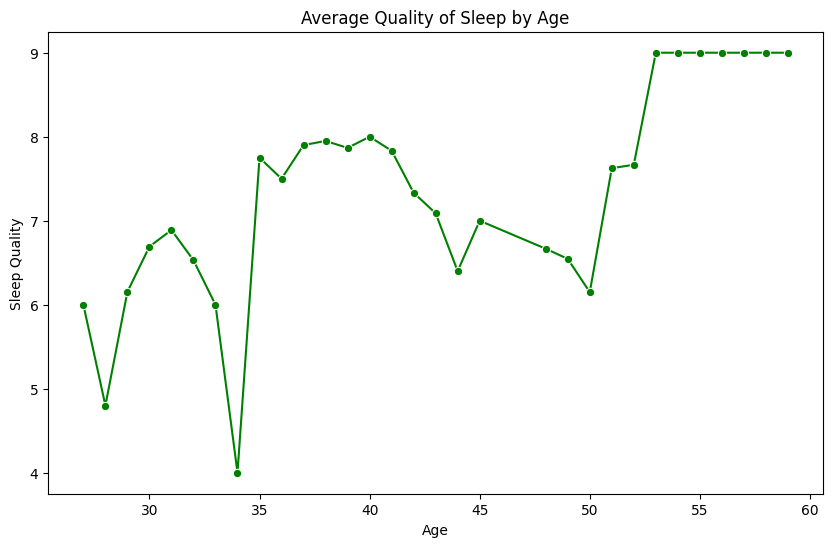

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = age_sleep_quality, marker = "o", color = "green")
plt.title("Average Quality of Sleep by Age")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

<ipython-input-25-e2b504d7bc1a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( y = "Occupation", data = df, palette = "Set2")


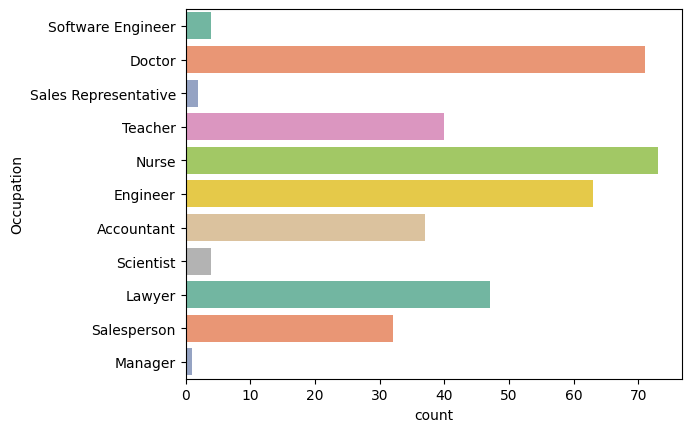

In [ ]:
sns.countplot( y = "Occupation", data = df, palette = "Set2")
plt.show()

In [ ]:
occupation_sleep = df.groupby("Occupation")[["Sleep Duration", "Quality of Sleep"]].mean()
occupation_sleep

,Sleep Duration,Quality of Sleep
Occupation,,
Accountant,7.113514,7.891892
Doctor,6.970423,6.647887
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Manager,6.900000,7.000000
Nurse,7.063014,7.369863
Sales Representative,5.900000,4.000000
Salesperson,6.403125,6.000000
Scientist,6.000000,5.000000


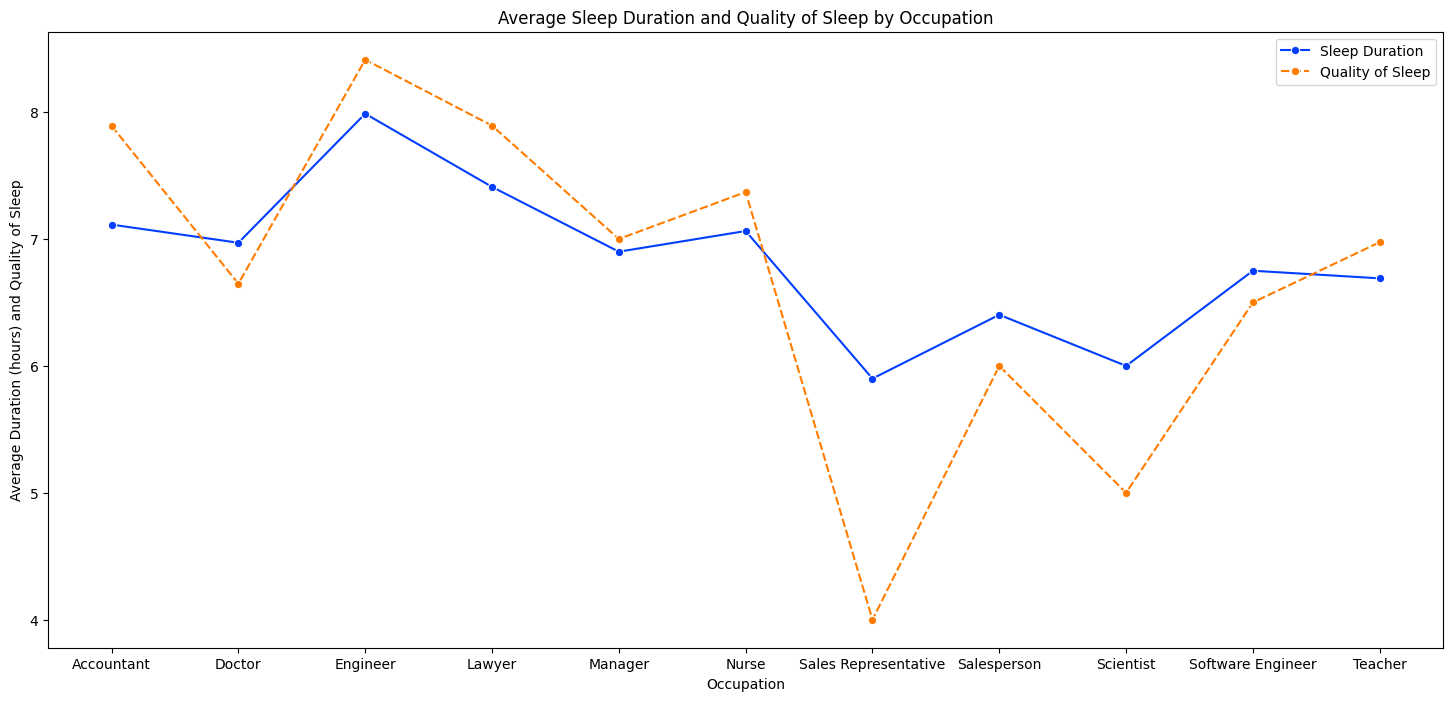

In [ ]:
plt.figure(figsize = (18, 8))
sns.lineplot(data = occupation_sleep, palette = "bright", marker = "o")
plt.title("Average Sleep Duration and Quality of Sleep by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Duration (hours) and Quality of Sleep")
plt.show()

In [ ]:
df["BMI Category"].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [ ]:
bmi_gender = df.groupby("Gender")["BMI Category"].value_counts()
bmi_gender

Gender  BMI Category 
Female  Overweight       106
        Normal            64
        Normal Weight     14
        Obese              1
Male    Normal           131
        Overweight        42
        Obese              9
        Normal Weight      7
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

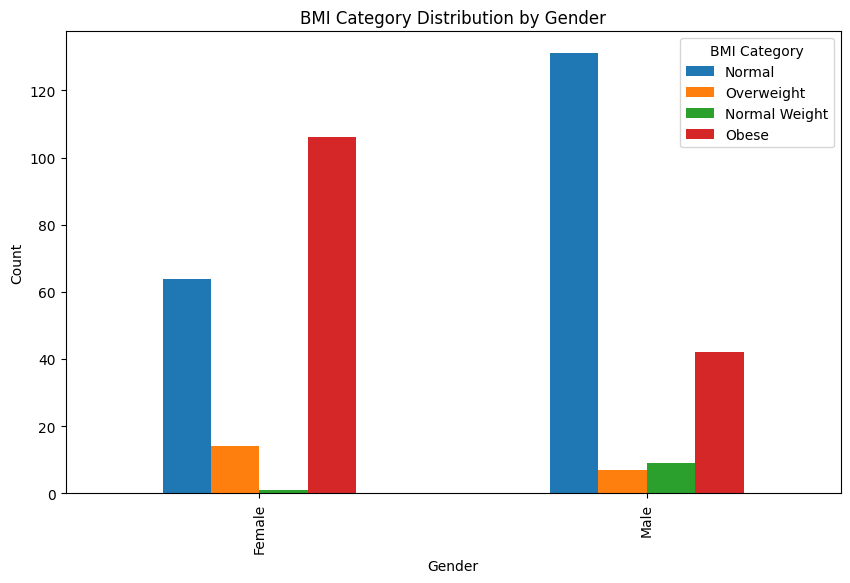

In [ ]:
plt.figure(figsize=(10, 6))
bmi_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("BMI Category Distribution by Gender")
plt.legend(title="BMI Category", labels=["Normal", "Overweight", "Normal Weight", "Obese"])
plt.show()

In [ ]:
gender_bmi_sleep = df.groupby(["Gender", "BMI Category"])["Sleep Duration"].mean().reset_index()
gender_bmi_sleep

,Gender,BMI Category,Sleep Duration
0,Female,Normal,7.793750
1,Female,Normal Weight,7.285714
2,Female,Obese,7.400000
3,Female,Overweight,6.880189
4,Male,Normal,7.198473
5,Male,Normal Weight,7.428571
6,Male,Obese,6.911111
7,Male,Overweight,6.492857


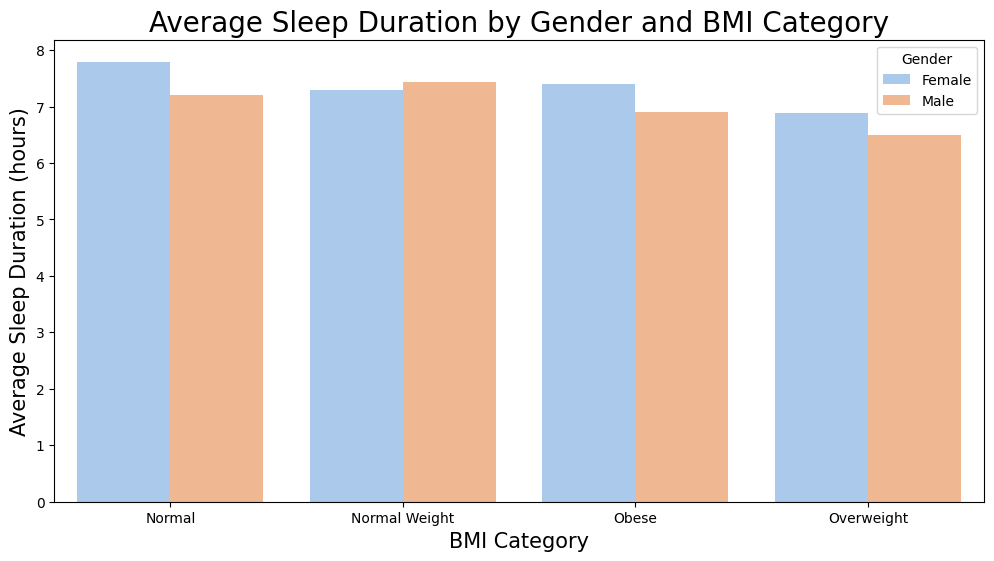

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = "BMI Category", y = "Sleep Duration", hue = "Gender", data = gender_bmi_sleep, palette = "pastel")
plt.title("Average Sleep Duration by Gender and BMI Category", fontsize = 20)
plt.xlabel("BMI Category", fontsize = 15)
plt.ylabel("Average Sleep Duration (hours)", fontsize = 15)
plt.show()

In [ ]:
BMI_quality = df.groupby("BMI Category")["Quality of Sleep"].mean()
BMI_quality

,Quality of Sleep
BMI Category,
Normal,7.661538
Normal Weight,7.428571
Obese,6.400000
Overweight,6.898649


<ipython-input-34-183631bfe4c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI Category", y="Quality of Sleep", data= df, palette="pastel")


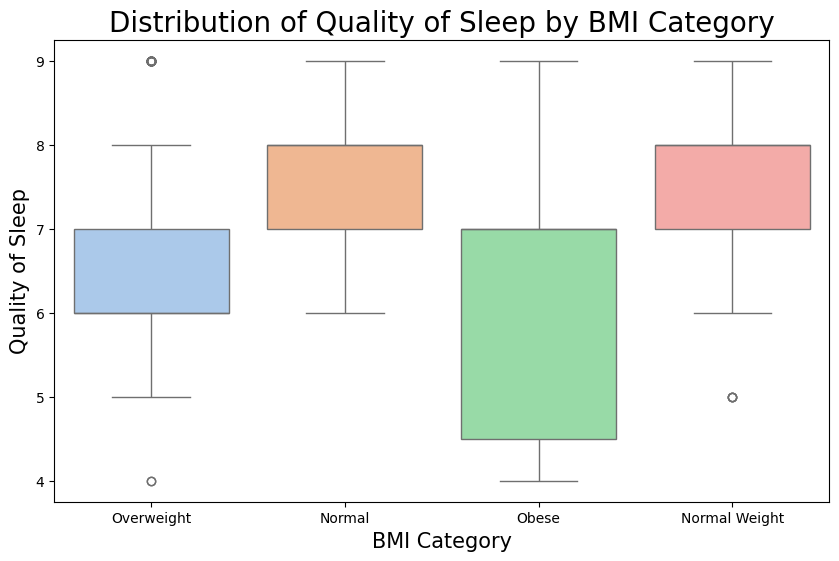

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BMI Category", y="Quality of Sleep", data= df, palette="pastel")
plt.title("Distribution of Quality of Sleep by BMI Category", fontsize=20)
plt.xlabel("BMI Category", fontsize=15)
plt.ylabel("Quality of Sleep", fontsize=15)
plt.show()


<ipython-input-35-53176c296630>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "BMI Category", y = "Quality of Sleep", data = df, palette = "pastel")


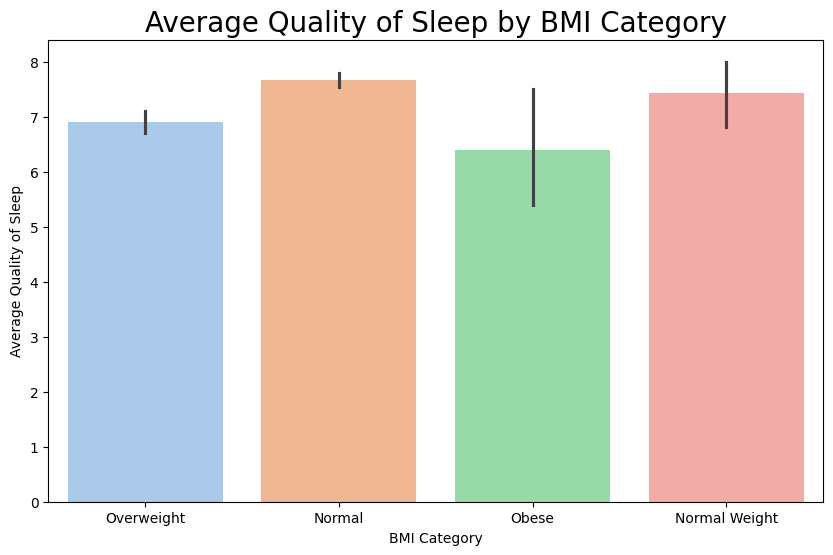

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "BMI Category", y = "Quality of Sleep", data = df, palette = "pastel")
plt.title("Average Quality of Sleep by BMI Category", fontsize = 20)
plt.xlabel("BMI Category")
plt.ylabel("Average Quality of Sleep")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 32.3+ KB


In [ ]:
gender_activity = df.groupby("Gender")["Physical Activity Level"].mean()
gender_activity

,Physical Activity Level
Gender,
Female,59.140541
Male,59.201058


<ipython-input-38-d1e2364bd9cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_activity.index, y = gender_activity.values, palette = "Set2")


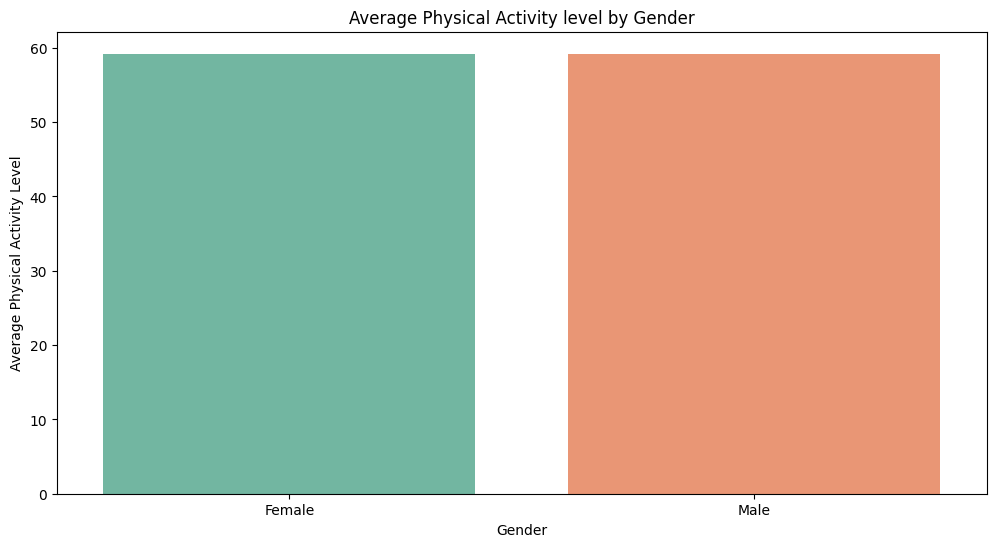

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = gender_activity.index, y = gender_activity.values, palette = "Set2")
plt.title("Average Physical Activity level by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Physical Activity Level")
plt.show()

In [ ]:
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand = True).astype(float)

#Calculating Mean Arterial Pressure (MAP)
df["MAP"] = df["Systolic_BP"] + 2 * df["Diastolic_BP"] /3

In [ ]:
corr_systolic = df["Sleep Duration"].corr(df["Systolic_BP"])

print(f"The correlation between Sleep Duration and Systolic BP: {corr_systolic}")

The correlation between Sleep Duration and Systolic BP: -0.18040627643004584


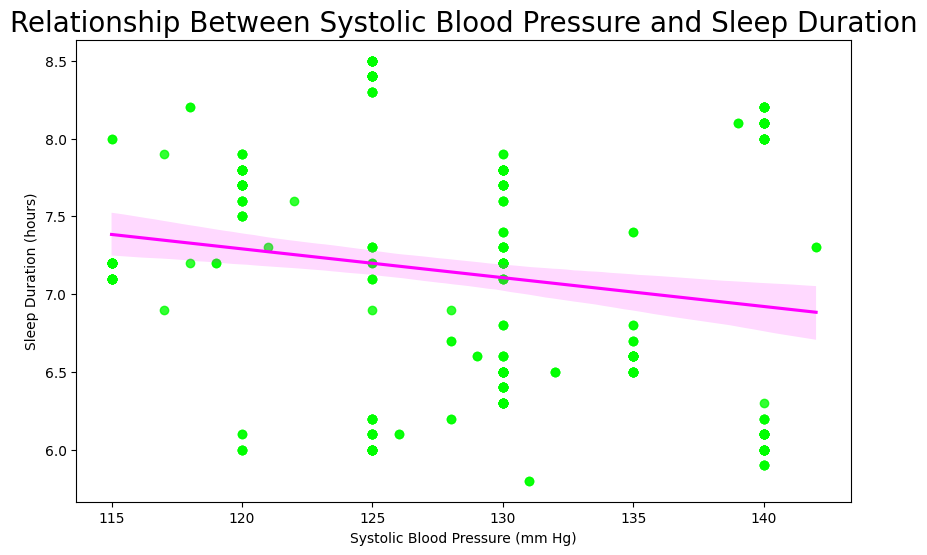

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "Systolic_BP", y = "Sleep Duration", data = df, scatter_kws = {"color": "lime"}, line_kws = {"color": "magenta"})
plt.title("Relationship Between Systolic Blood Pressure and Sleep Duration", fontsize = 20)
plt.xlabel("Systolic Blood Pressure (mm Hg)")
plt.ylabel("Sleep Duration (hours)")
plt.show()

In [ ]:
corr_diastolic = df["Sleep Duration"].corr(df["Diastolic_BP"])

print(f"The correlation between Sleep Duration and Diastolic BP: {corr_diastolic}")

The correlation between Sleep Duration and Diastolic BP: -0.16656986850262193


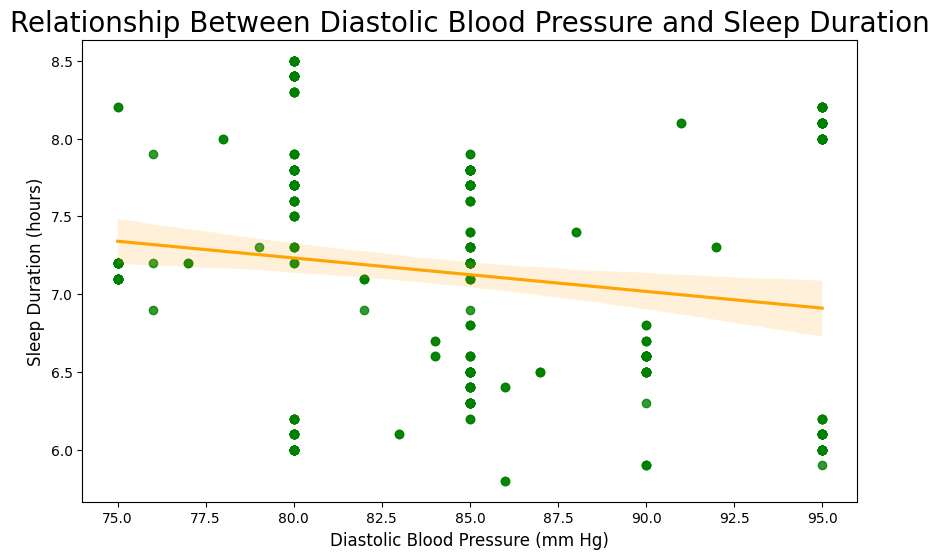

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Diastolic_BP", y="Sleep Duration", data=df, scatter_kws={"color":"green"}, line_kws={"color":"orange"})
plt.title("Relationship Between Diastolic Blood Pressure and Sleep Duration", fontsize=20)
plt.xlabel("Diastolic Blood Pressure (mm Hg)", fontsize=12)
plt.ylabel("Sleep Duration (hours)", fontsize=12)
plt.show()

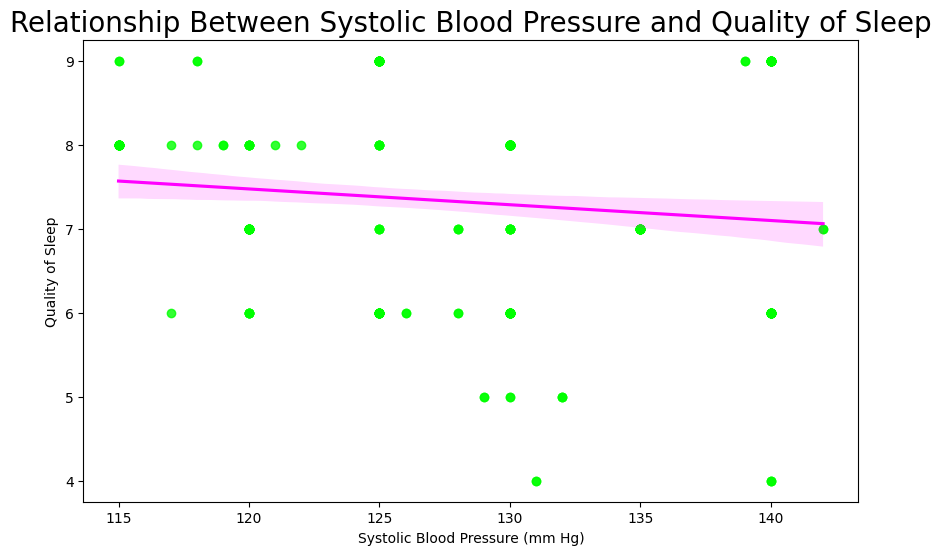

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "Systolic_BP", y = "Quality of Sleep", data = df, scatter_kws = {"color": "lime"}, line_kws = {"color": "magenta"})
plt.title("Relationship Between Systolic Blood Pressure and Quality of Sleep", fontsize = 20)
plt.xlabel("Systolic Blood Pressure (mm Hg)")
plt.ylabel("Quality of Sleep")
plt.show()

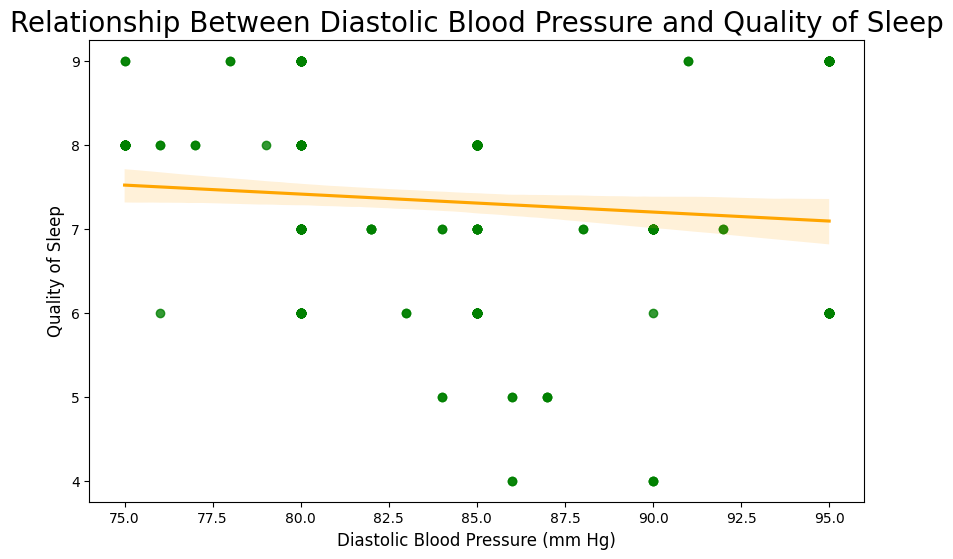

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Diastolic_BP", y="Quality of Sleep", data=df, scatter_kws={"color":"green"}, line_kws={"color":"orange"})
plt.title("Relationship Between Diastolic Blood Pressure and Quality of Sleep", fontsize=20)
plt.xlabel("Diastolic Blood Pressure (mm Hg)", fontsize=12)
plt.ylabel("Quality of Sleep", fontsize=12)
plt.show()

In [ ]:
stress_by_occupation = df.groupby("Occupation")["Stress Level"].mean()
stress_by_occupation

,Stress Level
Occupation,
Accountant,4.594595
Doctor,6.732394
Engineer,3.888889
Lawyer,5.063830
Manager,5.000000
Nurse,5.547945
Sales Representative,8.000000
Salesperson,7.000000
Scientist,7.000000


<ipython-input-47-b742ca09d7ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Stress Level", y="Occupation", data=stress_by_occupation.sort_values(ascending=False).reset_index(), palette="colorblind")


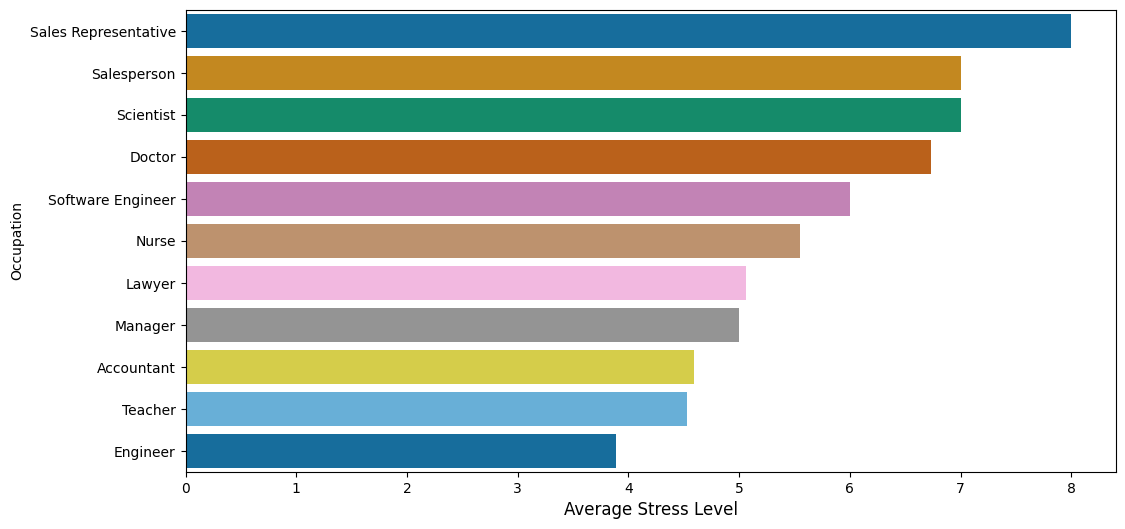

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Stress Level", y="Occupation", data=stress_by_occupation.sort_values(ascending=False).reset_index(), palette="colorblind")
plt.xlabel("Average Stress Level", fontsize = 12)
plt.ylabel("Occupation")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Systolic_BP              374 non-null    float64
 12  Diastolic_BP             374 non-null    float64
 13  MAP                      374 non-null    float64
dtypes: float64(4), int64(6), o

In [ ]:
heartrate_sleep = df.groupby("Sleep Duration")["Heart Rate"].mean()
heartrate_sleep

,Heart Rate
Sleep Duration,
5.8,81.000000
5.9,82.500000
6.0,73.000000
6.1,73.920000
6.2,74.166667
6.3,72.769231
6.4,73.333333
6.5,70.769231
6.6,67.300000


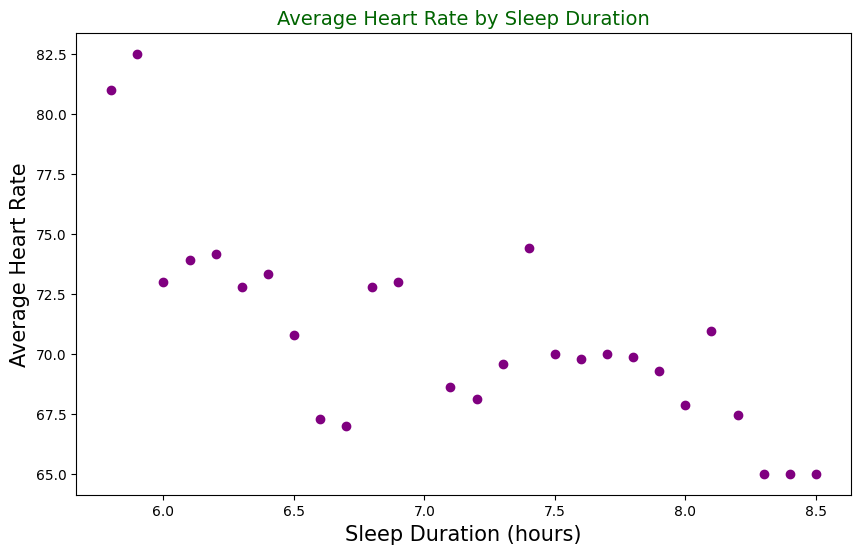

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(heartrate_sleep.index, heartrate_sleep.values, color = "purple")
plt.title("Average Heart Rate by Sleep Duration", fontsize = 14, color = "darkgreen")
plt.xlabel("Sleep Duration (hours)", fontsize = 15)
plt.ylabel("Average Heart Rate", fontsize = 15)
plt.show()

There seems to be an inverse relationship between sleep duration and heart rate—as people sleep longer, their heart rate tends to be lower. This might indicate that getting more sleep has a calming effect on the body, leading to a reduced heart rate.
This finding could support the idea that adequate sleep contributes to cardiovascular health, as a lower resting heart rate is often a sign of good heart health. Further statistical analysis would help quantify the strength and significance of this relationship.

In [ ]:
heartrate_quality = df.groupby("Quality of Sleep")["Heart Rate"].mean()
heartrate_quality

,Heart Rate
Quality of Sleep,
4,83.400000
5,77.714286
6,73.209524
7,69.415584
8,68.633028
9,67.154930


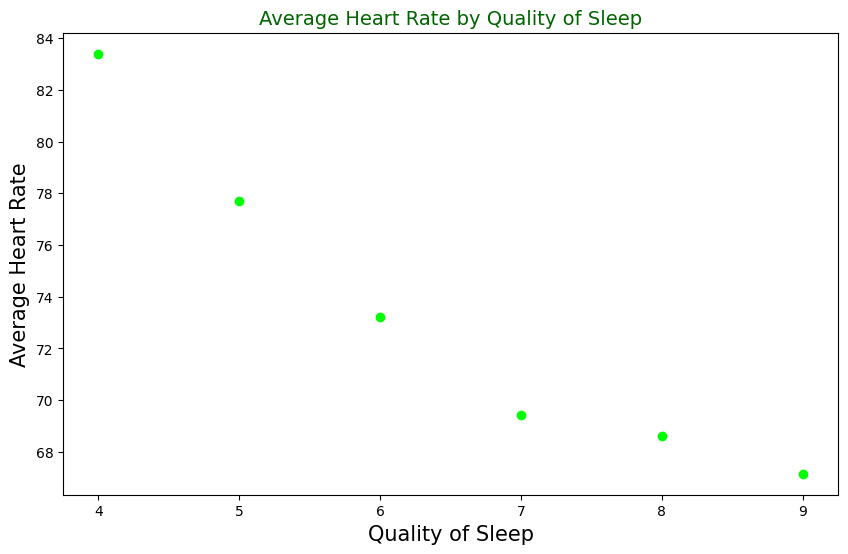

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(heartrate_quality.index, heartrate_quality.values, color = "lime")
plt.title("Average Heart Rate by Quality of Sleep", fontsize = 14, color = "darkgreen")
plt.xlabel("Quality of Sleep", fontsize = 15)
plt.ylabel("Average Heart Rate", fontsize = 15)
plt.show()

Insights from the Plot:
Negative Relationship: As quality of sleep improves (from 4 to 9), the average heart rate decreases. This indicates an inverse correlation between sleep quality and heart rate—better sleep quality is associated with a lower average heart rate.


Steep Drop at Lower Sleep Quality: The drop in heart rate is more noticeable when moving from lower sleep quality (around 4–6) to better sleep quality (7–9). At a sleep quality of 9, the heart rate reaches its lowest point in the graph.


Higher Heart Rate for Poor Sleep Quality: When the quality of sleep is lower (around 4 or 5), the heart rate tends to be higher, with values above 80 bpm.

This scatter plot shows that as sleep quality improves, the average heart rate decreases. People with lower sleep quality tend to have a higher heart rate, often above 80 beats per minute, while those with better sleep quality have lower heart rates. The graph suggests that better sleep quality is linked to a calmer state, reflected by a lower heart rate, which is good for overall health. This means that improving sleep quality may help lower heart rate, benefiting your heart and well-being.

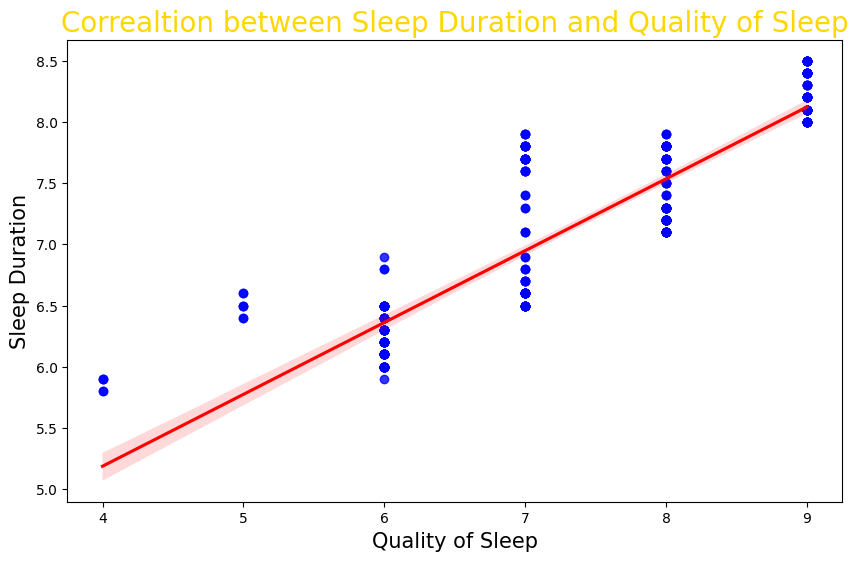

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "Quality of Sleep", y = "Sleep Duration", data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"})
plt.title("Correaltion between Sleep Duration and Quality of Sleep", fontsize = 20, color = "gold")
plt.xlabel("Quality of Sleep", fontsize = 15)
plt.ylabel("Sleep Duration", fontsize = 15)
plt.show()

Its obvious to see high positive correlation between Sleep duration and Quality Of Sleep

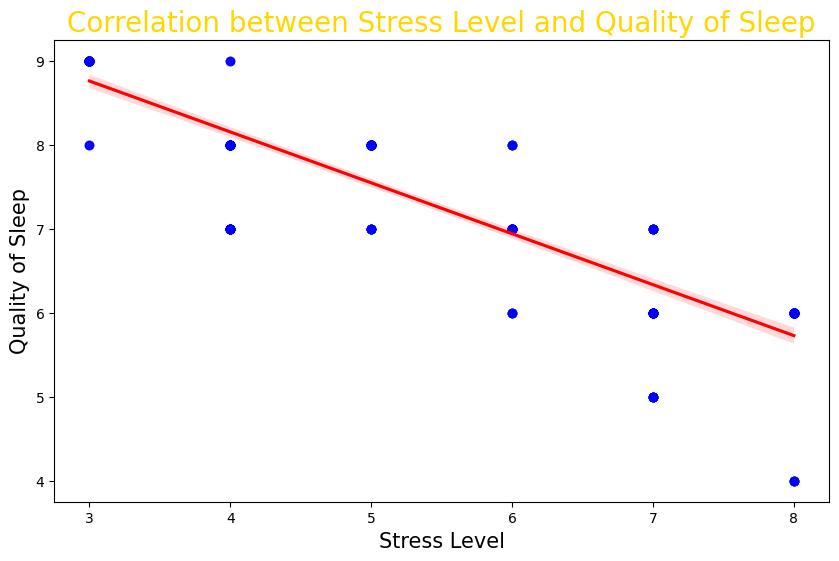

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "Stress Level", y = "Quality of Sleep", data = df, scatter_kws = {"color": "blue"}, line_kws = {"color": "red"} )
plt.title("Correlation between Stress Level and Quality of Sleep", fontsize = 20, color = "gold")
plt.xlabel("Stress Level", fontsize = 15)
plt.ylabel("Quality of Sleep", fontsize = 15)
plt.show()

We observe a noteworthy negative correlation between stress levels and the quality of sleep, which is indeed remarkable. But not surprising because negative relationship implies that when the stress levels are high, the people may encounter difficulties falling asleep, experience more frequent awakenings during the night, or have overall disrupted and poorer sleep quality. and that is understandable.

In [ ]:
steps_quality = df.groupby("Quality of Sleep")["Daily Steps"].mean()
steps_quality

,Daily Steps
Quality of Sleep,
4,3880.000000
5,4257.142857
6,7092.380952
7,6659.740260
8,7462.385321
9,6047.887324


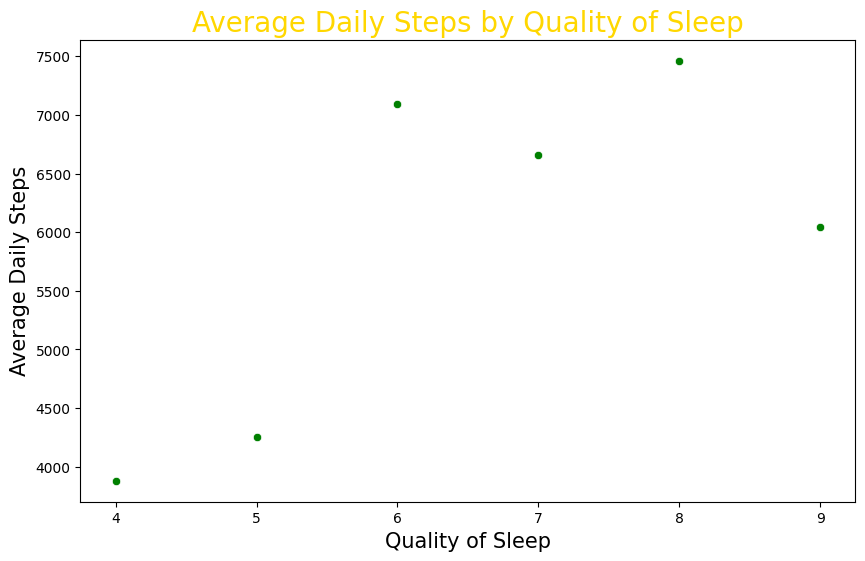

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = steps_quality.index, y = steps_quality.values, color = "green")
plt.title("Average Daily Steps by Quality of Sleep", fontsize = 20, color = "gold")
plt.xlabel("Quality of Sleep", fontsize = 15)
plt.ylabel("Average Daily Steps", fontsize = 15)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Systolic_BP              374 non-null    float64
 12  Diastolic_BP             374 non-null    float64
 13  MAP                      374 non-null    float64
dtypes: float64(4), int64(6), o

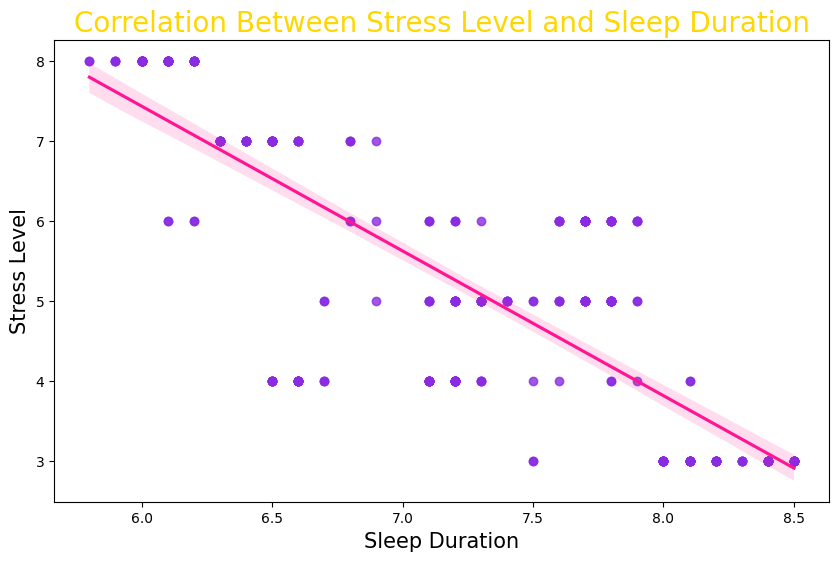

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(x = "Sleep Duration", y = "Stress Level", data = df, scatter_kws = {"color": "blueviolet"}, line_kws ={"color": "deeppink"})
plt.title("Correlation Between Stress Level and Sleep Duration", fontsize = 20, color = "gold")
plt.xlabel("Sleep Duration", fontsize = 15)
plt.ylabel("Stress Level", fontsize = 15)
plt.show()

In [ ]:
correlation_pearson = df["Sleep Duration"].corr(df["Stress Level"], method="pearson")
print(f"Pearson correlation: {correlation_pearson}")

Pearson correlation: -0.8110230278940451


The Pearson correlation of -0.81 indicates a strong negative relationship between "Sleep Duration" and "Stress Level." This means that as stress levels increase, sleep duration tends to decrease, and vice versa. The closer the value is to -1, the stronger the inverse relationship.

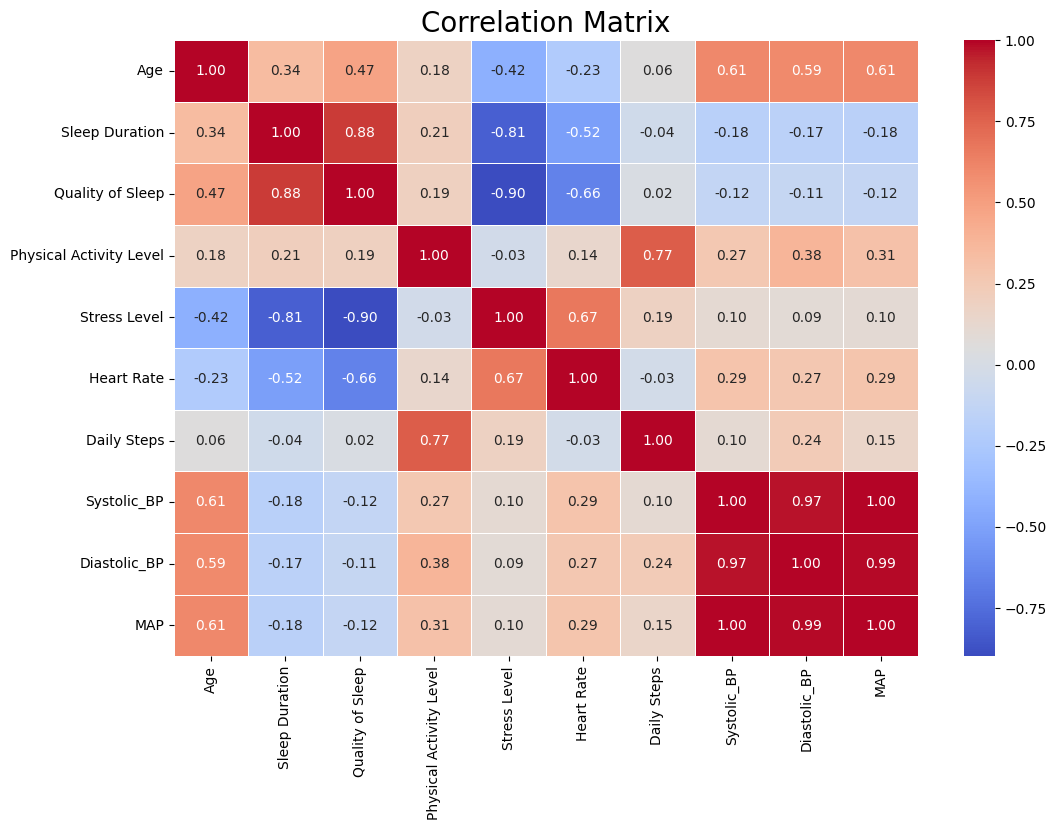

In [ ]:
numeric_df = df.select_dtypes(include = [float, int])

corr_matrix = numeric_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

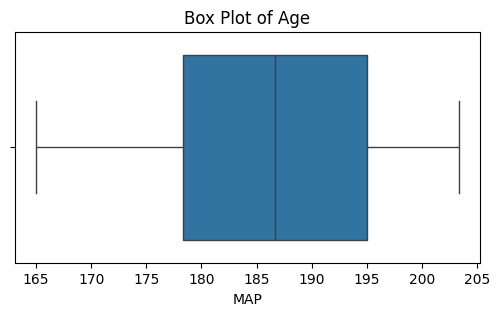

In [ ]:
plt.figure(figsize = (6, 3))
sns.boxplot(x = df["MAP"])
plt.title("Box Plot of Age")
plt.show()

In [ ]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Gender"].head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [ ]:
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,MAP
0,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,126.0,83.0,181.333333
1,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0,178.333333
2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,125.0,80.0,178.333333
3,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0,200.000000
4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0,200.000000
5,1,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,140.0,90.0,200.000000
6,1,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,140.0,90.0,200.000000
7,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,120.0,80.0,173.333333
8,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,120.0,80.0,173.333333
9,1,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,120.0,80.0,173.333333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Systolic_BP              374 non-null    float64
 12  Diastolic_BP             374 non-null    float64
 13  MAP                      374 non-null    float64
dtypes: float64(4), int64(7), o

In [ ]:
df = pd.get_dummies(df, columns=["BMI Category"], drop_first=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,MAP,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,126.0,83.0,181.333333,False,False,True
1,1,28,Doctor,6.2,6,60,8,125/80,75,10000,125.0,80.0,178.333333,False,False,False
2,1,28,Doctor,6.2,6,60,8,125/80,75,10000,125.0,80.0,178.333333,False,False,False
3,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,140.0,90.0,200.000000,False,True,False
4,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,140.0,90.0,200.000000,False,True,False


In [ ]:
dummy_columns = df.filter(like = "BMI Category").columns
df[dummy_columns] = df[dummy_columns].astype(int)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,MAP,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,126.0,83.0,181.333333,0,0,1
1,1,28,Doctor,6.2,6,60,8,125/80,75,10000,125.0,80.0,178.333333,0,0,0
2,1,28,Doctor,6.2,6,60,8,125/80,75,10000,125.0,80.0,178.333333,0,0,0
3,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,140.0,90.0,200.000000,0,1,0
4,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,140.0,90.0,200.000000,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      374 non-null    int64  
 1   Age                         374 non-null    int64  
 2   Occupation                  374 non-null    object 
 3   Sleep Duration              374 non-null    float64
 4   Quality of Sleep            374 non-null    int64  
 5   Physical Activity Level     374 non-null    int64  
 6   Stress Level                374 non-null    int64  
 7   Blood Pressure              374 non-null    object 
 8   Heart Rate                  374 non-null    int64  
 9   Daily Steps                 374 non-null    int64  
 10  Systolic_BP                 374 non-null    float64
 11  Diastolic_BP                374 non-null    float64
 12  MAP                         374 non-null    float64
 13  BMI Category_Normal Weight  374 non

In [ ]:
X = df[["Gender", "Age", "Sleep Duration", "Physical Activity Level", "Stress Level", "BMI Category_Normal Weight", "BMI Category_Obese", "BMI Category_Overweight", "Heart Rate", "Daily Steps"]]
y = df["Quality of Sleep"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([9.18930162, 5.68974978, 5.736891  , 9.18930162, 5.71936998,
       6.13530928, 5.76923529, 7.89195412, 9.21892182, 7.79869943,
       6.11506418, 7.12691708, 7.82831963, 5.71936998, 7.82831963,
       6.08447098, 5.52797542, 6.11506418, 9.21892182, 7.84208882,
       7.06767668, 8.17808267, 5.78948039, 7.23199242, 7.28185773,
       7.75820923, 6.11506418, 6.10568908, 6.10568908, 8.83362887,
       7.13778708, 8.18543503, 7.14716218, 8.87411908, 6.06422588,
       7.89195412, 5.75986019, 7.09729688, 7.82831963, 8.08772716,
       6.15555438, 6.08447098, 5.80826199, 6.10568908, 7.76907923,
       7.89195412, 7.91564128, 7.19702749, 4.74637991, 7.16740728,
       8.77438847, 6.70916754, 6.06422588, 8.22794798, 6.46033867,
       8.77438847, 6.76240586, 4.74637991, 8.78376357, 5.76923529,
       7.79869943, 6.37188769, 5.76923529, 7.14716218, 7.25223753,
       5.78948039, 6.11506418, 9.18930162, 8.20770287, 6.55729533,
       7.84208882, 6.10568908, 9.11919121, 6.08447098, 8.85387

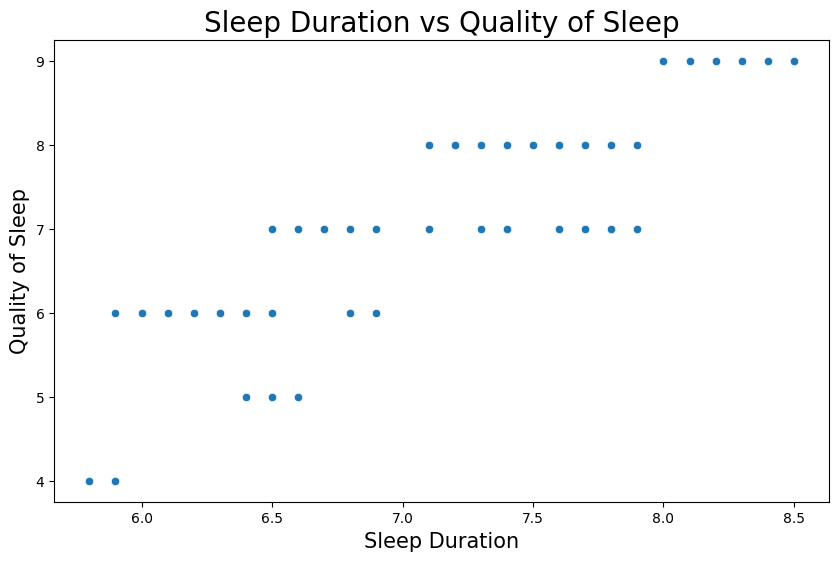

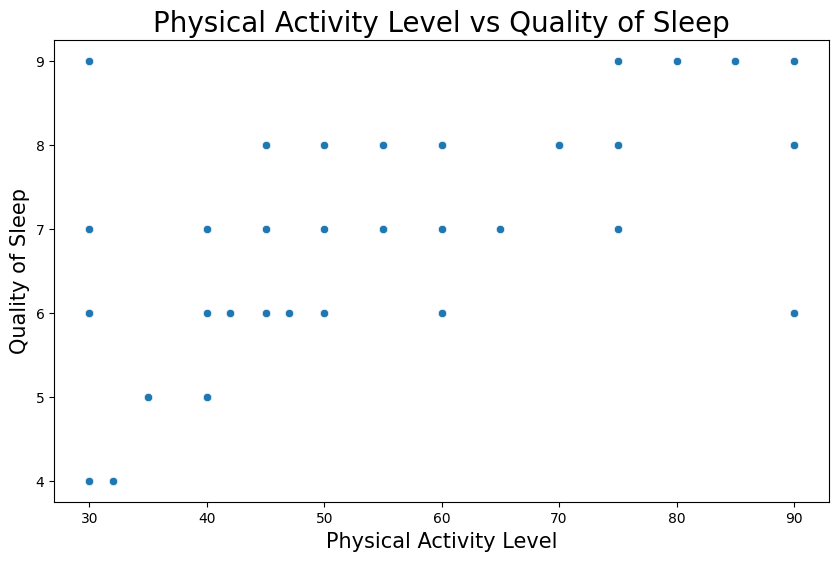

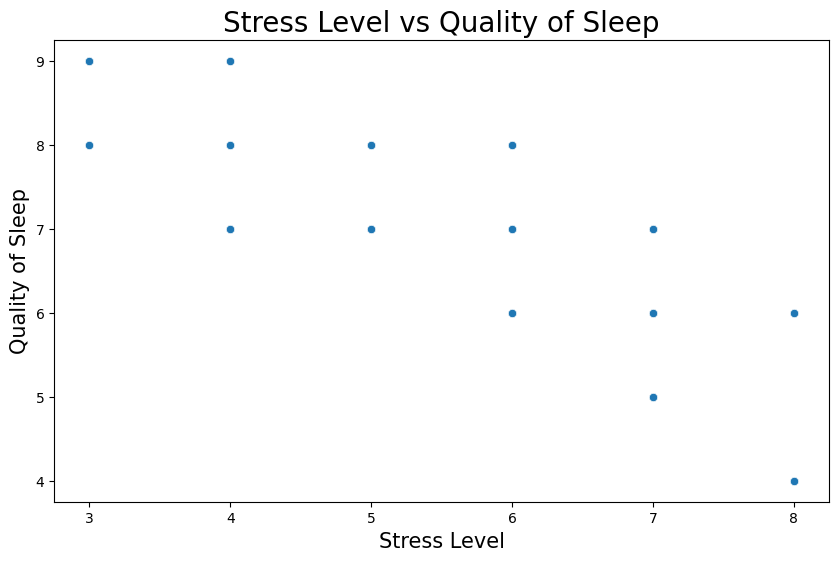

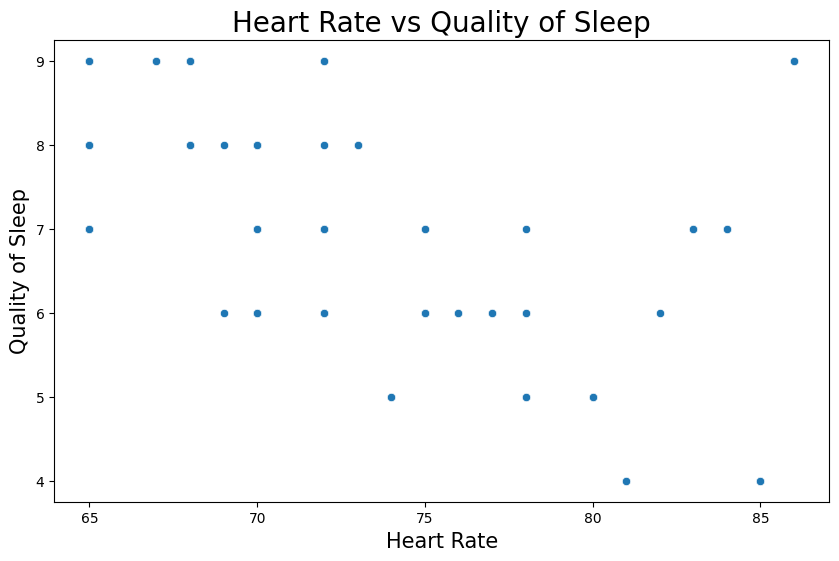

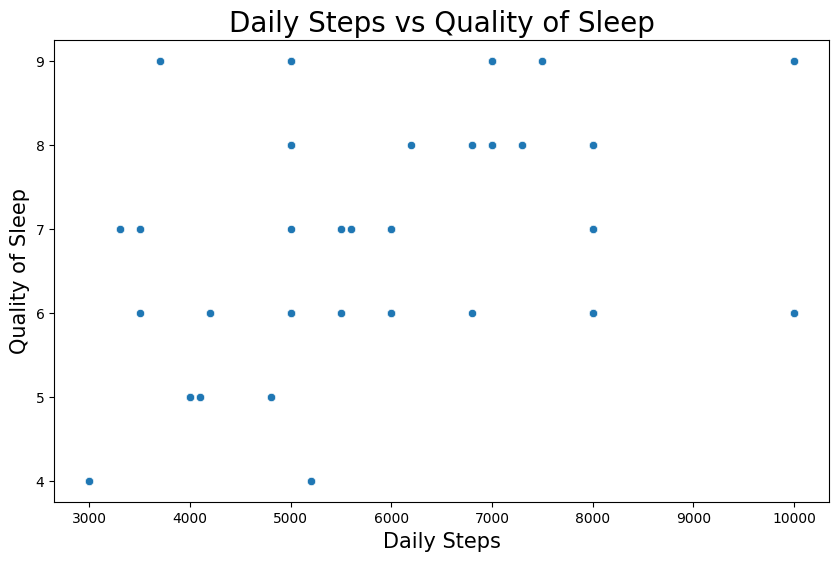

In [ ]:
features = ["Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

# Create scatterplots for each feature vs Quality of Sleep
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df["Quality of Sleep"])
    plt.title(f"{feature} vs Quality of Sleep", fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel("Quality of Sleep", fontsize=15)
    plt.show()

In [ ]:
mean_squared_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mean_squared_error}")

Mean Squared Error: 0.06854989154963384


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9545612609042317


In [ ]:
age = int(input("Enter your age: "))
gender = int(input("Enter your gender (1 for Male and 0 for Female): "))
sleep_duration = float(input("Enter your sleep duration in hours: "))
physical_activity = int(input("Enter your physical activity level in minutes per day: "))
stress_level = int(input("Enter your stress level (1 - 10): "))

bmi_category = input("Enter your BMI category (Normal Weight/Obese/Overweight): ").lower()
bmi_normal = 1 if bmi_category == "normal weight" else 0
bmi_obese = 1 if bmi_category == "obese" else 0
bmi_overweight = 1 if bmi_category == "overweight" else 0

heart_rate = int(input("Enter your heart rate: "))
daily_steps = int(input("Enter your daily steps: "))

print("\nInput Summary:")
print(f"Age: {age}")
print(f"Gender (1 for Male, 0 for Female): {gender}")
print(f"Sleep Duration: {sleep_duration} hours")
print(f"Physical Activity: {physical_activity} minutes per day")
print(f"Stress Level: {stress_level} (1-10)")

print(f"BMI Normal: {bmi_normal}")
print(f"BMI Obese: {bmi_obese}")
print(f"BMI Overweight: {bmi_overweight}")

print(f"Heart Rate: {heart_rate} bpm")
print(f"Daily Steps: {daily_steps} steps")

new_data = np.array([[gender, age, sleep_duration, physical_activity, stress_level, bmi_normal, bmi_obese, bmi_overweight, heart_rate, daily_steps ]])

predicted_quality = model.predict(new_data)
print(f"Predicted Quality of Sleep: {predicted_quality[0]}")


KeyboardInterrupt: Interrupted by user

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([9, 6, 6, 9, 6, 6, 6, 8, 9, 8, 6, 7, 8, 6, 8, 6, 6, 6, 9, 8, 7, 8,
       6, 7, 7, 8, 6, 6, 6, 9, 7, 8, 7, 9, 6, 8, 6, 7, 8, 8, 6, 6, 5, 6,
       8, 8, 8, 7, 4, 7, 9, 8, 6, 8, 7, 9, 8, 4, 9, 6, 8, 7, 6, 7, 7, 6,
       6, 9, 8, 7, 8, 6, 9, 6, 9])

In [ ]:
print(y.unique())

[6 4 7 5 8 9]


In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

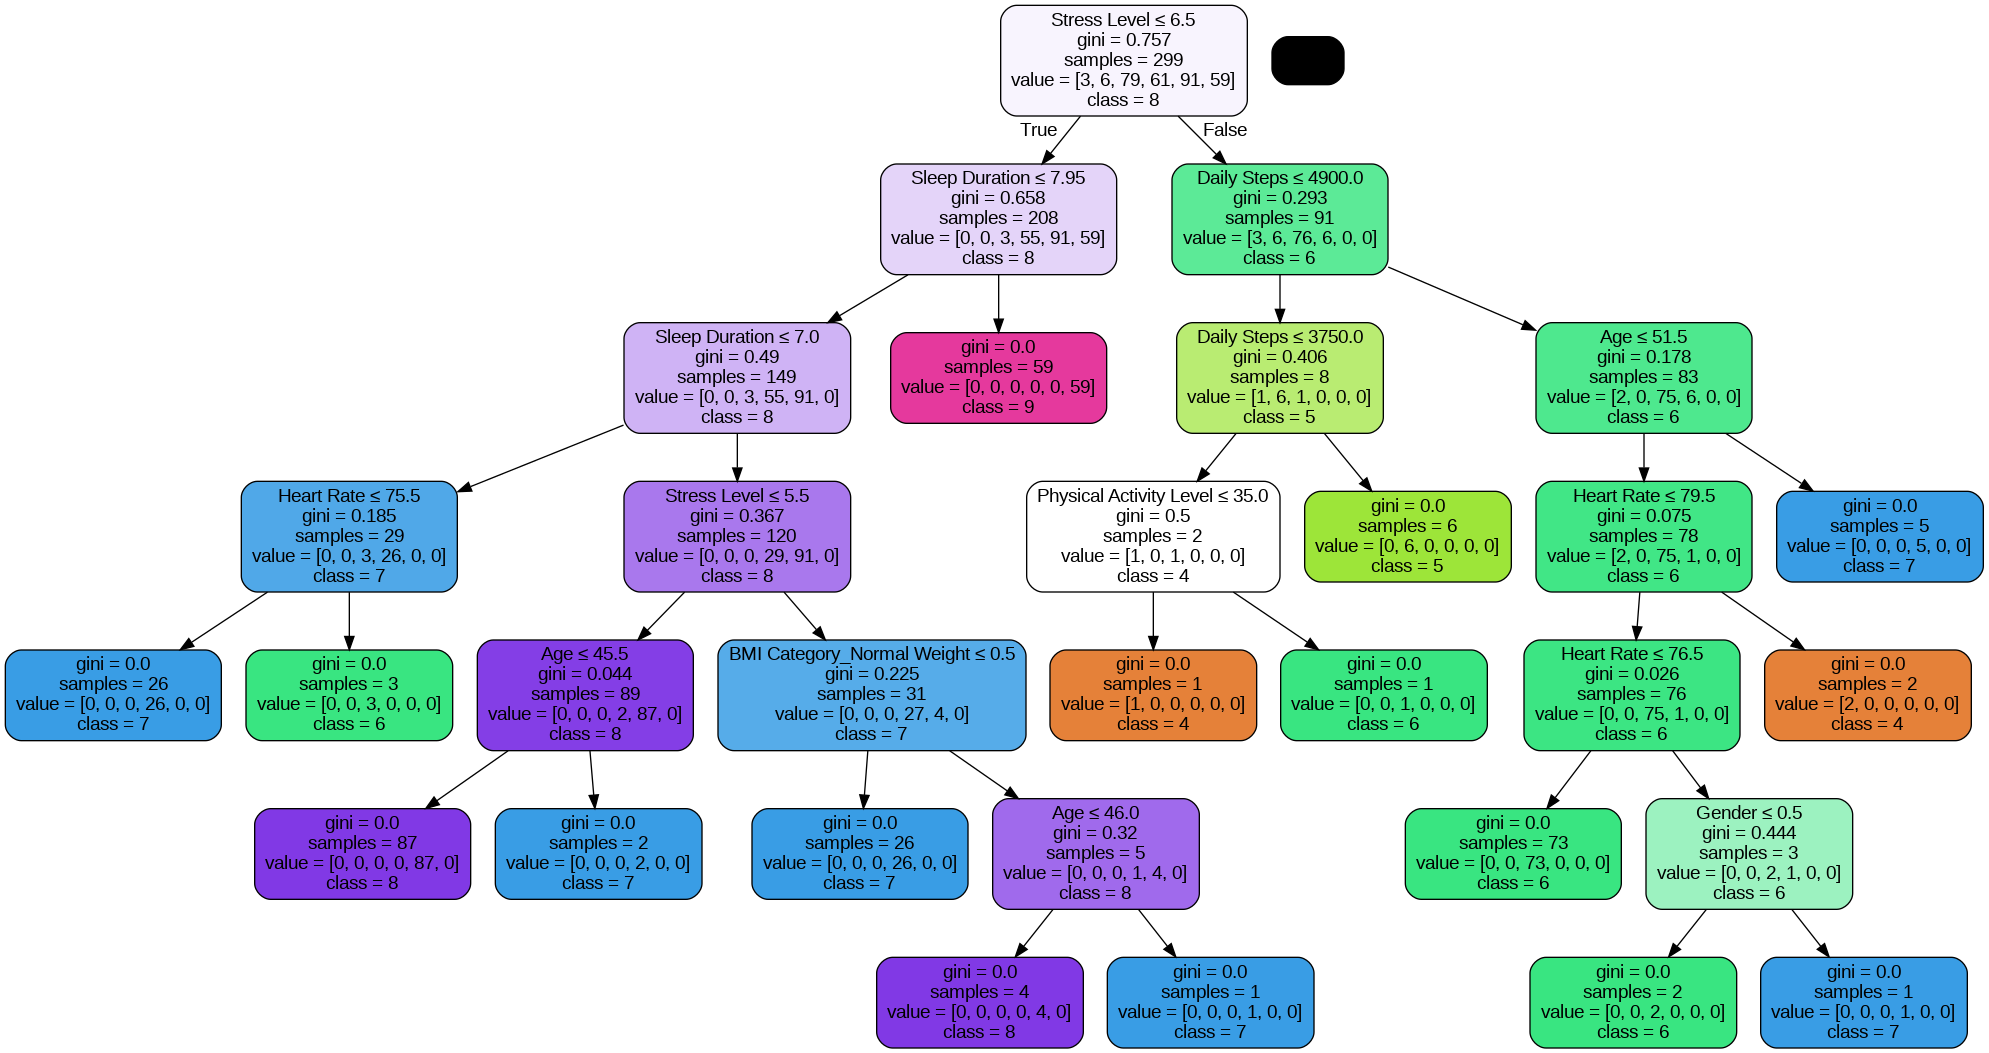

In [ ]:
features = X.columns
dot_data = export_graphviz(dt_classifier, out_file = None, feature_names = features, class_names = ["4", "5", "6", "7", "8", "9"],
                           filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy * 100: .2f}%")

Accuracy of Decision Tree:  97.33%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 100.00%
